In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = sns.load_dataset('mpg')
df = df.dropna()  # remove null values from horsepower

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
X = df[['mpg', 'weight']]
y = df['origin']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'max_depth' : range(1, 50)}]

clf = DecisionTreeClassifier()

search = GridSearchCV(clf, param_grid, cv=10)

search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid=[{'max_depth': range(1, 50)}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scor

In [42]:
search.best_score_

0.6964856230031949

In [43]:
search.best_params_

{'max_depth': 39}

In [38]:
from sklearn.preprocessing import MinMaxScaler  # in order to understand the decision boundary, we'll normalize our data

X = MinMaxScaler().fit_transform(df[['mpg', 'horsepower']])
y = df['origin'].map({'usa':1, 'europe':2, 'japan':3})  # the visualization below cannot work with nominal values

dt_arr = []  # this array holds the knn-predictors
dt_name_arr = []  # this array holds the names of the knn-predictors for visualization
for i in range(1, 10):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X, y)
    dt_arr.append(dt)
    dt_name_arr.append("Decision Tree (max_depth={})".format(i))


In [39]:
len(dt_name_arr)

9

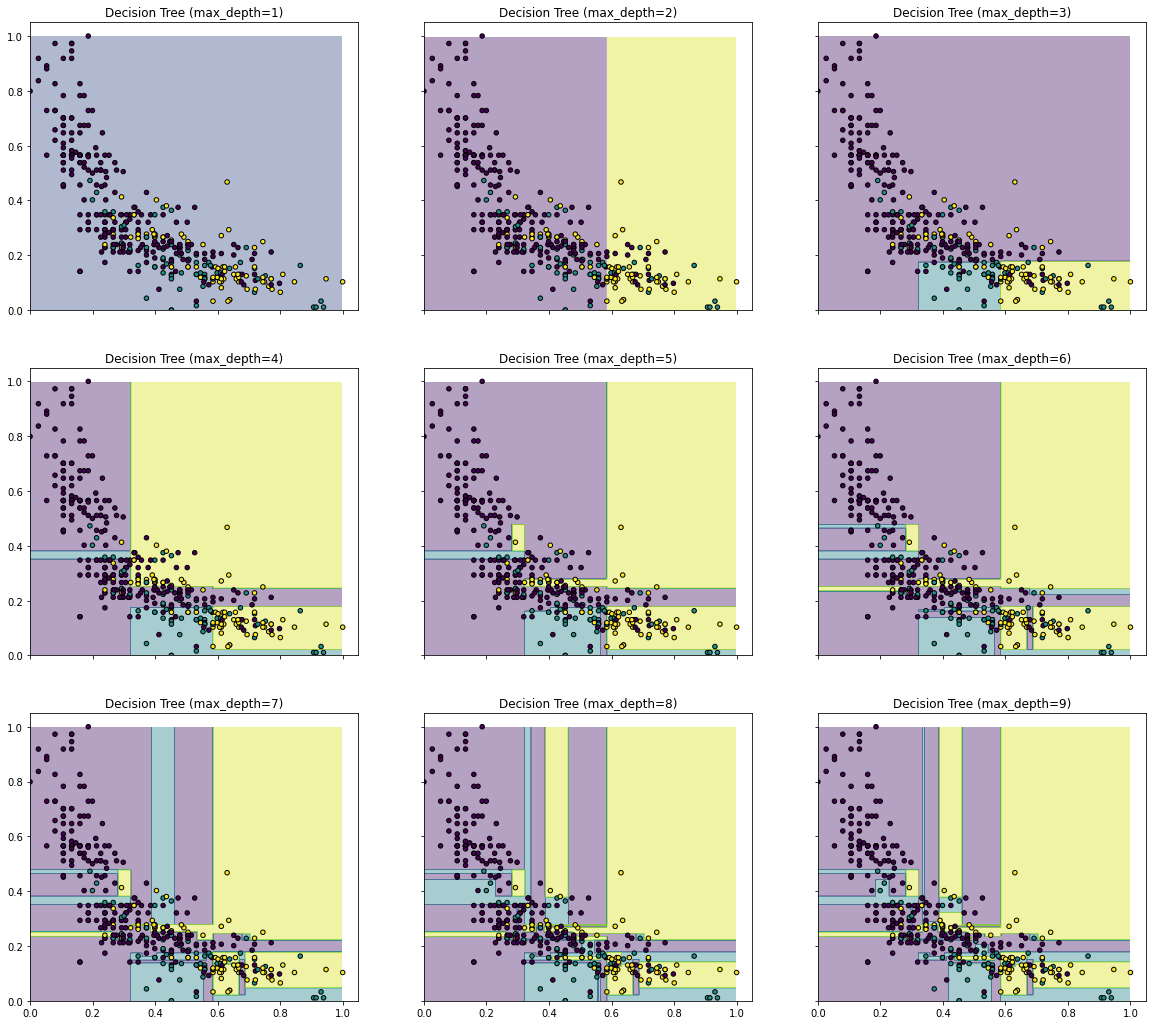

In [40]:
# for the approach, see https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min(), X[:, 0].max()  # this is always 0,1 if MinMaxSclaer is used
y_min, y_max = X[:, 1].min(), X[:, 1].max() # this is always 0,1 if MinMaxSclaer is used
steps = 300  # --> looks better if larger
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/steps),
                     np.arange(y_min, y_max, (y_max-y_min)/steps))  


f, axarr = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(20, 18))

# for each model, create the decision boundary and plot it into the right sub-plot (via idx)
for idx, clf, tt in zip(product([0,1,2], [0,1,2]), dt_arr, dt_name_arr):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)  # predict the mesh
       
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)  # draw decision boundary
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')  # plot the original data (normalized)
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()